In [ ]:
!pip install transformers
!pip install torch
!pip install pandas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch


In [ ]:
df = pd.read_csv("/content/sample_data/reviews_data.csv")

In [ ]:
df['Review'].fillna('No Review Text', inplace=True)

In [ ]:
df = df[df['Review'] != "No Review Text"]

df.reset_index(drop=True, inplace=True)

In [ ]:
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
808,Mary,"Hillsboro, OR","Reviewed Dec. 16, 2007",NaN,"When using my debit card, how much and for how...",['No Images']
809,Angie,"Innsbruck, OR","Reviewed Sept. 17, 2007",NaN,I just bought a starbucks thermos mug about a ...,['No Images']
810,Sabine,"Redondo Beach, CA","Reviewed Dec. 19, 2006",NaN,I'm (was) a regular customer who ordered a lat...,['No Images']
811,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
selected_columns = df[['name', 'Rating', 'Review']]
selected_columns

,name,Rating,Review
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,5.0,I just wanted to go out of my way to recognize...
3,Taylor,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...
808,Mary,NaN,"When using my debit card, how much and for how..."
809,Angie,NaN,I just bought a starbucks thermos mug about a ...
810,Sabine,NaN,I'm (was) a regular customer who ordered a lat...
811,Becky,NaN,I ordered two venti frappacino's without whipp...


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the model and tokenizer
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
sentiments = []

for review in selected_columns['Review']:
    inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True)

    with torch.no_grad():
        logits = model(**inputs).logits

    # Use softmax to get the predicted class probabilities
    predicted_probabilities = torch.softmax(logits, dim=1)

    # Find the class with the highest probability as the predicted sentiment label
    predicted_class_id = predicted_probabilities.argmax(dim=1).item()
    sentiment = model.config.id2label[predicted_class_id]

    sentiments.append(sentiment)

# Add the predicted sentiments to the DataFrame
selected_columns['sentiment'] = sentiments


<ipython-input-16-1daf0f652c64>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['sentiment'] = sentiments


In [28]:
selected_columns.sample(5)

,name,Rating,Review,sentiment
187,Bill,2.0,Once thought Starbucks was a smart company but...,NEG
727,Joy,NaN,I worked in this location over 6 years and had...,NEG
572,Ellen,1.0,I recently spoke with a manager at Starbucks c...,NEG
778,Cynthia,NaN,I ordered a caramel frappe with extra caramel....,NEG
670,Doaa,1.0,My iPad was stolen from Starbucks Egypt (Soil ...,NEG


In [ ]:
import plotly.express as px
ratings = selected_columns["Rating"].value_counts().reset_index()
ratings.columns = ['Rating', 'Count']

fig = px.pie(
    ratings,
    values='Count',
    names='Rating',
)

fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}: %{percent}<br>Count: %{value}',
)

fig.show()

In [ ]:
j = selected_columns['sentiment']

In [ ]:
j

0      POS
1      POS
2      POS
3      POS
4      POS
      ... 
808    NEG
809    NEG
810    NEU
811    NEG
812    NEG
Name: sentiment, Length: 813, dtype: object

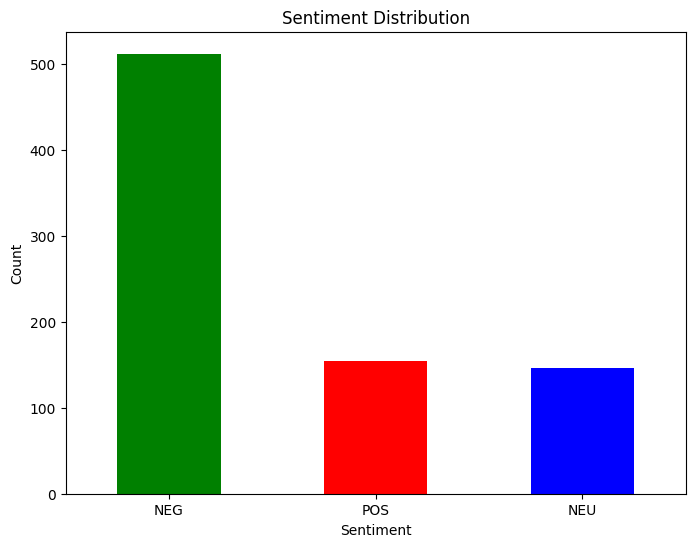

In [ ]:
sentiment_counts = j.value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

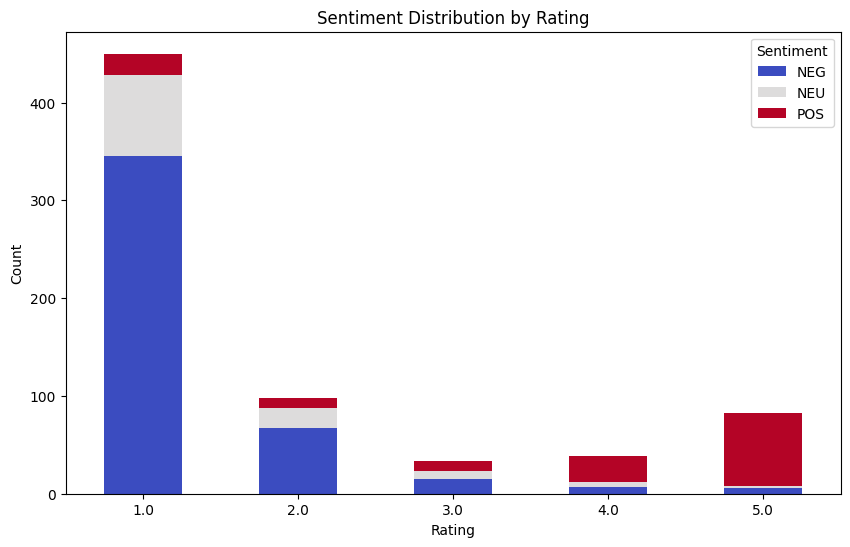

In [29]:

# Group the data by rating and count the occurrences of each sentiment
sentiment_counts = selected_columns.groupby('Rating')['sentiment'].value_counts().unstack(fill_value=0)

# Plot the grouped bar graph
sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=0)

plt.show()